In [35]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import HeUniform,GlorotNormal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.losses import BinaryCrossentropy,SparseCategoricalCrossentropy

In [3]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [4]:
print(x_train.shape)
print(x_train.size)

(60000, 28, 28)
47040000


In [5]:
print(y_train.size)
print(y_train.shape)

60000
(60000,)


In [6]:
print(x_test.size)
print(x_test.shape)
print(y_test.size)
print(y_test.shape)

7840000
(10000, 28, 28)
10000
(10000,)


In [7]:
x_train,x_test=x_train/255.,x_test/255.

## Using  dropout (loss and accuracy)

In [9]:
model = Sequential (
    [
        Flatten(input_shape=(28, 28)),
        Dense(units=120,activation="relu"),
        Dropout(rate=0.2),
        Dense(units=10,activation="softmax")
        
    ]
)

In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,optimizer="Adam",  
    metrics=["accuracy"]
)

In [11]:
history =model.fit(
    x_train,y_train,epochs=10,
    validation_split=.2,
    batch_size=32,
    verbose=2
)

Epoch 1/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9025 - loss: 0.3343 - val_accuracy: 0.9518 - val_loss: 0.1644
Epoch 2/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9515 - loss: 0.1655 - val_accuracy: 0.9643 - val_loss: 0.1180
Epoch 3/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9627 - loss: 0.1242 - val_accuracy: 0.9700 - val_loss: 0.1007
Epoch 4/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9687 - loss: 0.1017 - val_accuracy: 0.9705 - val_loss: 0.0979
Epoch 5/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9738 - loss: 0.0842 - val_accuracy: 0.9724 - val_loss: 0.0920
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9756 - loss: 0.0749 - val_accuracy: 0.9747 - val_loss: 0.0851
Epoch 7/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9792 - loss: 0.0651 - val_accuracy: 0.9740 - val_loss: 0.0874
Epoch 8/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9806 - loss: 0.0591 - val_accuracy: 0.9771 - val_loss: 0.0837
Epoch 9/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9821 - loss: 0.0532 - val_accuracy: 0.9769 - 

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,232 (1.09 MB)

 Trainable params: 95,410 (372.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 190,822 (745.40 KB)

In [14]:
test_loss, test_acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9761 - loss: 0.0848


In [15]:
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"\nTest accuracy: {test_loss:.4f}")


Test accuracy: 0.9793

Test accuracy: 0.0753


In [16]:
predictions = model.predict(x_test)
predicted_label = tf.argmax(predictions[0:2])  # Get predicted label for the first test image
print(f"Predicted label: {predicted_label}, Actual label: {y_test[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
Predicted label: [1 1 1 0 0 1 1 0 1 0], Actual label: 7


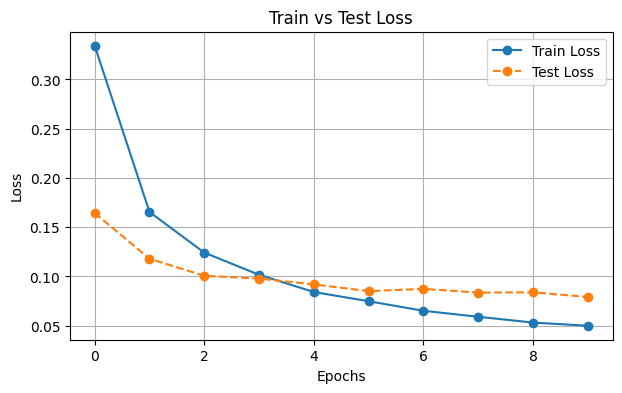

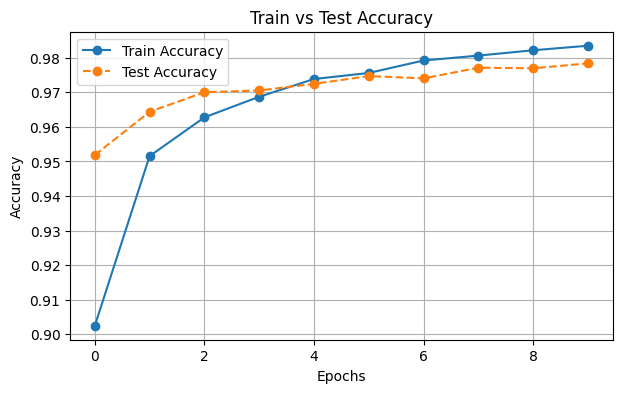

In [17]:
# Plot Train vs Test Loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Train Loss',marker="o")
plt.plot(history.history['val_loss'], label='Test Loss',marker="o",linestyle="--")
plt.title('Train vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("p1.png")
plt.show()

# Plot Train vs Test Accuracy
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy',marker="o")
plt.plot(history.history['val_accuracy'], label='Test Accuracy',marker="o",linestyle="--")
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("p2.png")
plt.show()

## without dropout (loss and accuracy )

In [18]:
model = Sequential (
    [
        Flatten(input_shape=(28, 28)),
        Dense(units=120,activation="relu"),
        # Dropout(rate=0.2),
        Dense(units=10,activation="softmax")
        
    ]
)

In [19]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,optimizer="Adam",  
    metrics=["accuracy"]
)

history =model.fit(
    x_train,y_train,epochs=10,
    validation_split=.2,
    validation_data=(x_test,y_test),
    batch_size=32,
    verbose=2
)

Epoch 1/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9239 - loss: 0.2686 - val_accuracy: 0.9497 - val_loss: 0.1598
Epoch 2/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9652 - loss: 0.1171 - val_accuracy: 0.9658 - val_loss: 0.1107
Epoch 3/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9750 - loss: 0.0813 - val_accuracy: 0.9751 - val_loss: 0.0867
Epoch 4/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9815 - loss: 0.0608 - val_accuracy: 0.9753 - val_loss: 0.0803
Epoch 5/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9855 - loss: 0.0465 - val_accuracy: 0.9765 - val_loss: 0.0799
Epoch 6/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9885 - loss: 0.0371 - val_accuracy: 0.9780 - val_loss: 0.0711
Epoch 7/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9903 - loss: 0.0303 - val_accuracy: 0.9778 - val_loss: 0.0735
Epoch 8/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.9786 - val_loss: 0.0750
Epoch 9/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9780 - 

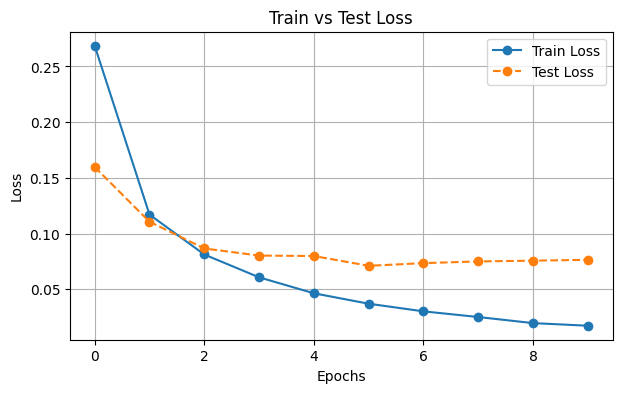

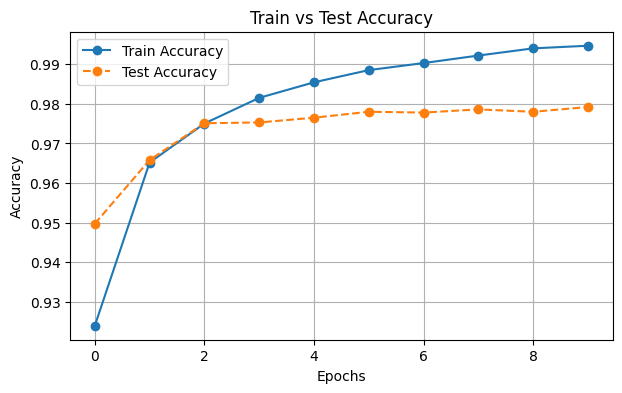

In [21]:
# Plot Train vs Test Loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Train Loss',marker="o")
plt.plot(history.history['val_loss'], label='Test Loss',marker="o",linestyle="--")
plt.title('Train vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("p1.png")
plt.show()

# Plot Train vs Test Accuracy
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy',marker="o")
plt.plot(history.history['val_accuracy'], label='Test Accuracy',marker="o",linestyle="--")
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("p2.png")
plt.show()

## Using HeUniform to init weights
    - Proper weight initialization helps avoid issues like vanishing/exploding gradients and ensures the network
      starts with weights that    are not too large or too small, which can hinder the learning process.

In [32]:
model = Sequential (
    [
        Flatten(input_shape=(28, 28)),
        Dense(units=120,activation="relu",kernel_initializer=GlorotNormal()),
        Dropout(rate=0.2),
        Dense(units=10,activation="softmax")
        
    ]
)

In [33]:

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,optimizer="Adam",  
    metrics=["accuracy"]
)

history =model.fit(
    x_train,y_train,epochs=10,
    validation_split=.2,
    validation_data=(x_test,y_test),
    batch_size=32,
    verbose=2
)

Epoch 1/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9122 - loss: 0.3012 - val_accuracy: 0.9559 - val_loss: 0.1482
Epoch 2/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9557 - loss: 0.1475 - val_accuracy: 0.9661 - val_loss: 0.1099
Epoch 3/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9661 - loss: 0.1123 - val_accuracy: 0.9742 - val_loss: 0.0839
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9717 - loss: 0.0912 - val_accuracy: 0.9733 - val_loss: 0.0831
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9750 - loss: 0.0786 - val_accuracy: 0.9774 - val_loss: 0.0711
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9786 - loss: 0.0686 - val_accuracy: 0.9772 - val_loss: 0.0775
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9809 - loss: 0.0610 - val_accuracy: 0.9777 - val_loss: 0.0717
Epoch 8/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9821 - loss: 0.0546 - val_accuracy: 0.9796 - val_loss: 0.0653
Epoch 9/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9830 - loss: 0.0530 - val_accuracy: 0.9778 - 

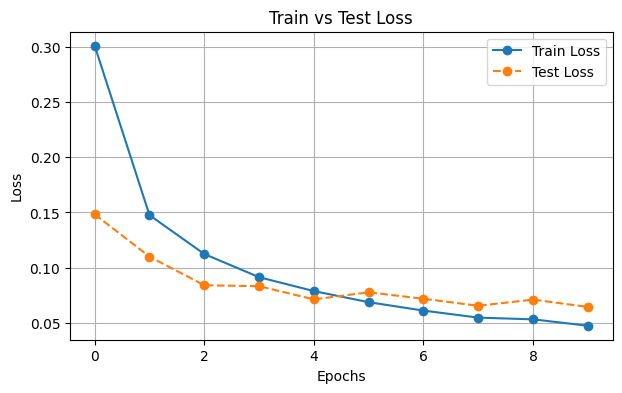

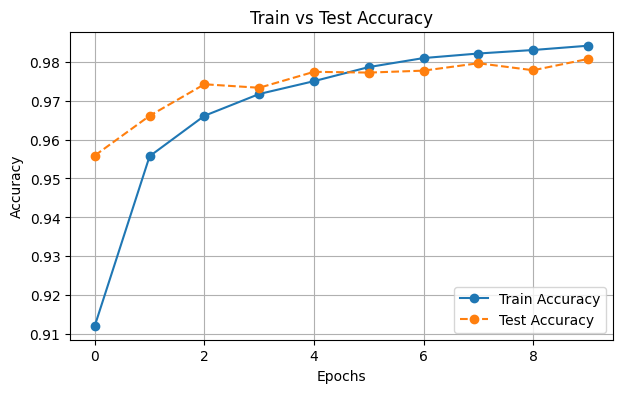

In [34]:
# Plot Train vs Test Loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Train Loss',marker="o")
plt.plot(history.history['val_loss'], label='Test Loss',marker="o",linestyle="--")
plt.title('Train vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("p1.png")
plt.show()

# Plot Train vs Test Accuracy
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy',marker="o")
plt.plot(history.history['val_accuracy'], label='Test Accuracy',marker="o",linestyle="--")
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("p2.png")
plt.show()

In [44]:
np.mean(np.subtract(history.history["loss"],history.history["val_loss"]))

np.float64(0.016918379813432693)

In [47]:
np.mean(history.history["loss"])

np.float64(0.10151185095310211)

In [48]:
np.mean(history.history["val_loss"])

np.float64(0.08459347113966942)

In [53]:
np.mean(history.history["accuracy"])

np.float64(0.9689449965953827)

In [52]:
np.mean(history.history["val_accuracy"])

np.float64(0.973989999294281)